In [ ]:
from nbdev import *
%nbdev_hide_input
%load_ext autoreload
%autoreload 2
!date

Tue Apr 20 11:33:30 PDT 2021


# B1259-63 Analysis
> Create a B1259-63 (aka PSR J1302-6350) light curve using Bayesian Blocks  

* [HESS high-energy results](https://arxiv.org/pdf/astro-ph/0506280.pdf)

* [Previouis *fermi* paper](https://arxiv.org/pdf/1912.05868.pdf)

In [ ]:
%nbdev_collapse_input

from light_curves.tools import *
from wtlike.config import *
from wtlike.bayesian import *
from utilities.ipynb_docgen import *

In [ ]:
%nbdev_collapse_input
bba = None

def B1259(name='PSR_B1259-63', expect=1):
    r"""
    ## Fit to all data

    {date}
    
    Create a `BayesianBlockAnalysis` object with all the data
    
    {outp}
 
    Combine the likelihoods for all the data, check the fit. 
    Normalization should be very close to 1.0, a check on the weights.
    {fig1}
    
    Note that the "significant count factor", $\sigma_{{flux}} \times \sqrt{{N}}$, is {sig_cnt_factor:.0f}.
 
    ## The full daily-interval light curve, showing the BB partitions
    {fig2}
    
    ## Expand about each periastron
 
    #### Periastron dates

    Assuming {p}-day orbital period, the MJD and UTC values are:
    
    {utc}
 
    Expand the above about those dates
    

    {fig3}
    
    ### Output Table
    
    {df_text}
    
    Download it: [{lc_file}]({lc_file}).
    """
    global bba # lc, bb_lc # make these availlable for follow-up cells
    config = Config(data_folder='/home/burnett/weekly', verbose=1)
    assert config.valid, f"Invalid configuration {config}"
 
    pd.set_option('display.precision', 3)#, 'display.colheader_justify','left')
    plt.rc('font', size=14)
    source = PointSource(name)
    
    with capture_print('Output from partition step') as outp:
        if bba is None:
            bba = BayesianBlockAnalysis(config, source)
            bba.partition()
        else:
            print('(already done)')
    lc = bba.lc_df
    bb_lc = bba.bb_fit

    # Fig 1
    lka = bba.all_data_likelihood()
    fig1,ax = plt.subplots(figsize=(4,2))
    lka.plot(ax=ax, xlim=(0.5, 1.5) )
    fi = lka.fit_info(); 
    sig_cnt_factor =  fi['sig_flux']*np.sqrt(fi['counts'])
    
   
    df = fit_table(bb_lc, expect=expect)
    df_text = monospace(str(df), 'BB fit table', open=True)
        
    plt.rc('font', size=16)
    fig2, ax2 = plt.subplots(1,1, sharex=True, figsize=(20,4), num=2)
    bba.plot( ax = ax2, yscale='log')
    ax2.text(0.05, 0.85, name,  transform=ax2.transAxes);
    ax2.set_xlabel('MJD', fontsize=20)
    fig2.width=600
    
    tp, p =55546, 1237
    t = [ dict(MJD=tp+n*p, UTC=UTC(tp+n*p)[:10]) for n in range(4) ]
    
    utc = monospace(str(pd.DataFrame(t))) # seems to confuse 
    
    import matplotlib.ticker as ticker

    fig3, axx = plt.subplots(4,1, sharex=True, sharey=True, figsize=(12,12), num=3)
    plt.subplots_adjust(hspace=0.)
    for i, ax in enumerate(axx.flatten()):
        bba.plot( ax=ax, tzero=tp+i*p, xlim=(-60,150), ylim=(2,None),
                 colors=('red', 'bisque', 'blue'),yscale='log', xlabel='',ylabel='')
        ax.text(0.02, 0.85, UTC(tp+i*p)[:4], transform=ax.transAxes)
        ax.axvline(0, color='grey', ls=':')
        ax.yaxis.set_major_formatter(ticker.FuncFormatter(
            lambda val,pos: { 1.0:'1', 10.0:'10', 100.:'100'}.get(val,'')))
    axx[-1].set_xlabel('days about periastron', fontsize=20)
    fig3.text(0.04, 0.5, 'Relative Flux', va='center', rotation='vertical', fontsize=20)
    fig3.width=600
    
    df = fit_table(bb_lc, expect=expect)
    df_text = monospace(str(df), 'fits to blocks.', open=False)
        
    ### Save the BB intervals
    lc_out = bb_lc.copy()

    lc_out.loc[:,'flux'] = bb_lc.fit.apply(lambda fit: round(fit.flux,3))
    errors = bb_lc.fit.apply(lambda fit: np.array(fit.errors).round(3)).values
    elow, ehigh = [[x[i] for x in errors] for i in range(2)]
    lc_out['low']=elow
    lc_out['high']=ehigh
    lc_display = lc_out['t tw n flux low high'.split()]
    lc_file = 'images/B1259_lc.csv'
    lc_display.to_csv(lc_file)
    return locals()
nbdoc(B1259)

## Fit to all data

2021-04-20 15:11

Create a `BayesianBlockAnalysis` object with all the data

<details  class="nbdoc-description" >  <summary> Output from partition step </summary>  <div style="margin-left: 5%"><pre>photons and exposure for PSR_B1259-63: Restoring from cache with key "PSR_B1259-63_weekly_data"<br>Time bins: 4636 intervals of 1 days, from MJD 54683.0(2008-08-05) to 59319.0(2021-04-15))<br>Loaded 4465 / 4465 cells with exposure &gt; 0.3 for light curve analysis<br>PSR_B1259-63_weekly_bb_edges: Restoring from cache with key "PSR_B1259-63_weekly_bb_edges"<br>Partitioned 4465 cells into 30 blocks, using LikelihoodFitness <br>Loaded 30 / 30 cells with exposure &gt; 0.3 for fitting<br></pre></div> </details>

Combine the likelihoods for all the data, check the fit. 
Normalization should be very close to 1.0, a check on the weights.
<div class="nbdoc_image">
<figure style="margin-left: 5%" title="Figure 1">  <a href="images/B1259_fig_01.png" title="images/B1259_fig_01.png">    <img src="images/B1259_fig_01.png" alt="Figure 1 at images/B1259_fig_01.png" >   </a> </figure>
</div>


Note that the "significant count factor", $\sigma_{flux} \times \sqrt{N}$, is 266.

## The full daily-interval light curve, showing the BB partitions
<div class="nbdoc_image">
<figure style="margin-left: 5%" title="Figure 2">  <a href="images/B1259_fig_02.png" title="images/B1259_fig_02.png">    <img src="images/B1259_fig_02.png" alt="Figure 2 at images/B1259_fig_02.png" width=600>   </a> </figure>
</div>


## Expand about each periastron

#### Periastron dates

Assuming 1237-day orbital period, the MJD and UTC values are:

<div style="margin-left: 5%"><pre>     MJD         UTC<br>0  55546  2010-12-16<br>1  56783  2014-05-06<br>2  58020  2017-09-24<br>3  59257  2021-02-12</pre></div>

Expand the above about those dates


<div class="nbdoc_image">
<figure style="margin-left: 5%" title="Figure 3">  <a href="images/B1259_fig_03.png" title="images/B1259_fig_03.png">    <img src="images/B1259_fig_03.png" alt="Figure 3 at images/B1259_fig_03.png" width=600>   </a> </figure>
</div>


### Output Table

<details  class="nbdoc-description" >  <summary> fits to blocks. </summary>  <div style="margin-left: 5%"><pre>          t      tw       n     flux             errors  sigma_dev    limit<br>0   55102.5   828.0  530570    0.000         (0, 0.029)       -5.4    0.174<br>1   55539.5    35.0   21588    7.474       (-1.95, 2.0)        3.5   10.843<br>2   55560.5     7.0    7437   24.026    (-3.979, 4.009)        5.9   30.669<br>3   55569.0    10.0   11610    0.000         (0, 2.158)        0.4    4.828<br>4   55576.5     5.0    4275   48.498    (-5.936, 5.997)        8.3   58.456<br>5   55580.5     3.0    2584  110.138   (-9.908, 10.039)       11.9  126.853<br>6   55590.0    16.0    9724   58.622    (-4.167, 4.195)       14.5   65.567<br>7   55606.5    17.0   11039   30.676     (-3.418, 3.44)        8.9   36.367<br>8   56190.5  1100.0  757398    0.000         (0, 0.034)       -4.9    0.204<br>9   56788.0    44.0   34389    5.417    (-1.524, 1.555)        3.0    8.024<br>10  56813.5     7.0    9046   27.039    (-3.656, 3.682)        7.3   33.135<br>11  56819.0     4.0    5368   86.173    (-6.102, 6.158)       14.9   96.388<br>12  56826.0    10.0   10429   39.141    (-3.575, 3.599)       11.0   45.096<br>13  56831.5     1.0     746  164.815  (-20.662, 21.172)        8.9  200.438<br>14  56835.5     7.0    6269   54.491    (-4.973, 5.015)       11.3   62.805<br>15  56843.0     8.0    7943   11.121    (-3.411, 3.532)        3.2   17.120<br>16  56850.5     7.0    4272   58.785    (-6.249, 6.314)        9.7   69.269<br>17  57431.5  1148.0  779911    0.000          (0, 0.04)       -4.5    0.240<br>18  58034.0    50.0   32481   11.120     (-1.654, 1.66)        6.2   13.860<br>19  58059.5     1.0     988  210.965  (-20.195, 20.627)       11.8  245.569<br>20  58065.0    10.0   10606   24.588    (-3.319, 3.341)        7.3   30.116<br>21  58072.5     5.0    4039   60.736    (-6.457, 6.526)        9.7   71.575<br>22  58076.0     2.0    1589  186.308  (-14.812, 15.062)       14.0  211.470<br>23  58078.0     2.0    1302   81.792  (-12.217, 12.445)        7.1  102.617<br>24  58083.5     9.0    5049   31.849     (-4.93, 4.977)        6.5   40.106<br>25  58088.5     1.0     716  193.346   (-22.307, 22.87)        9.7  231.842<br>26  58091.0     4.0    2180   32.151    (-7.194, 7.598)        5.0   45.297<br>27  58656.5  1025.0  782536    0.000         (0, 0.043)       -4.3    0.257<br>28  59265.5    91.0   73335    5.242    (-1.047, 1.049)        4.1    6.972<br>29  59315.0     8.0    4809   41.291    (-5.331, 5.383)        7.8   50.224</pre></div> </details>

Download it: [images/B1259_lc.csv](images/B1259_lc.csv).


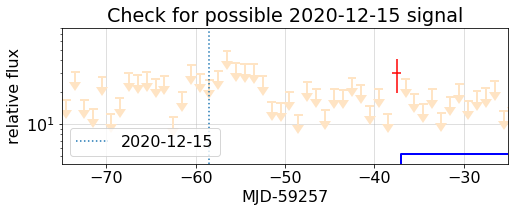

In [ ]:
%nbdev_collapse_input
utc = 59198.5
tzero = 59257
date = UTC(utc)[:10]
fig, ax=plt.subplots(figsize=(8,2.5))
bba.plot(ax=ax,yscale='log',colors=('red', 'bisque', 'blue'),
         tzero=59257, xlim=(-75, -25 ), ylim=(None,80));
ax.axvline(utc-tzero, ls=':', label=date)
ax.set(xlabel=f'MJD-{tzero}')
ax.set_title(f'Check for possible {date} signal')
ax.legend(loc='lower left');

## Questions for Discussion, with 2/28 Scargle comments

#### How do I interpret the apparent abrupt transitions? 
>Think of BB as the best step-function representation
of the data.  It does not mean that the discontinuities 
are claimed to be real -- the underlying light curve
is most likely continuous and smooth at some level.  
BB is just saying that there is a statistically significant
change from one block to the next.

Compare with a [flare from 3C 279](https://tburnett.github.io/wtlike/bayesian.html#bb_overplot), which has measurements rather than limits for each day and the time scale is in the day range. 

#### Is the day interval appropriate? 
>BB can always benefit from finer sampling, so if you
have data on shorter intervals (or even photon data)
you can get more information out ... e.g. a better 
determination of the time of "transitions" (see above).



#### I know that there is a ~4% systematic for the individual daily measurements, seen in the Geminga data. Does this matter?
>Systematic errors are a problem ... BB is not magic here.

## My observations, plans

There are two related questions here. 
1. what is the actual behavior of B1259, besides the obvious flares? Can we characterize each periastron to detect changes? Kent Wood is very interested in this.
2. How well does BB work, when applied to daily likelihoods, many of which are just limits, but do contain information? This is a question that Jeff Scargle had never considered before, but is quite interested in.


#### Run Simulations

I'll use the [wtlike simulation capability](https://tburnett.github.io/wtlike/simulation) to test the sensitivity to various light curves, when daily fits are all or mostly limits.

#### Add Systematics to Likelihood
The presence of a systematic error in the exposure--I've measured 4% with Geminga, slightly invalidates the likelihood. A fix is to widen it, which I can easily do using the [wtlike Poisson representation](https://tburnett.github.io/wtlike/poisson#Poisson). 